Predicted species: Iris-setosa


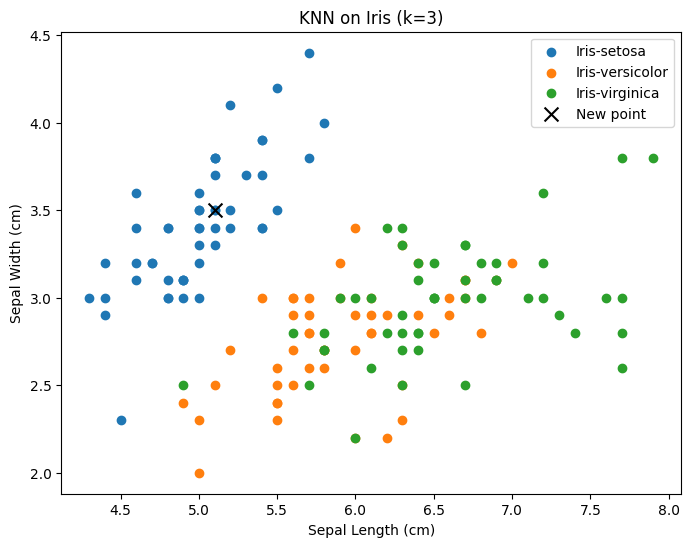

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 1. Load only needed columns
df = pd.read_csv(r"D:\Coding\MSc\3rd sem\Datasets\AI&ML_Dataset\Iris.csv")

df = df[['SepalLengthCm', 'SepalWidthCm', 'Species']]

# 2. New point to classify
new_point = [5.1, 3.5]

# 3. Distance function
def euclidean(a, b):
    return np.sqrt(np.sum((np.array(a) - np.array(b)) ** 2))

# 4. Simple KNN
def knn(df, x_new, k=3):
    # compute (distance, species) for each row
    dist = [
                (euclidean(x_new, [sl, sw]), species)
                for sl, sw, species in df.values
            ]
    # sort by distance and take first k
    k_near = sorted(dist)[:k]
    labels = [species_name for distance, species_name in k_near]
    species = Counter(labels).most_common(1)[0][0]
    return species, k_near

pred_species, neighbors = knn(df, new_point, k=3)
print("Predicted species:", pred_species)

# 5. Plot data + new point
plt.figure(figsize=(8, 6))
for species in df['Species'].unique():
    sub = df[df['Species'] == species]
    plt.scatter(sub['SepalLengthCm'], sub['SepalWidthCm'], label=species)

plt.scatter(new_point[0], new_point[1],
            color='black', marker='x', s=100, label='New point')

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("KNN on Iris (k=3)")
plt.legend()
plt.show()
